Experiment 2
Generation of Pulse Code Modulation and its reconstruction.

In [2]:
# Libraries Required for the given experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd
from scipy import signal

In [3]:
#functions
# The purpose of this function is to 
def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

# The purpose of this function is to provide with the quantized value of the signal
def Uniform_quantizater(input, level):
    step_size = 2 * max(input) / (level-1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal

# The purpose of this function is to calculate SQNR through plot
def SQNR(signal_1, signal_2):
    signal_power = np.mean(signal_1**2)
    noise_power = np.mean((signal_1 - signal_2)**2)
    return 10 * np.log10(signal_power / noise_power)

#The purpose of this signal is to calculate the SQNR theoretically
def SQNR_theo(bits):
    return (6 *bits) + 1.76

#The purpose of this function is to tabulate the different quantisation levels
def Tabular(Signal): 
    solution = pd.DataFrame({'Levels':Signal})
    solution = solution.drop_duplicates().reset_index(drop=True)
    solution = solution.drop(0)
    return solution

#The purpose of this function is to assign a binary number to ech of the quantization level
def Binary(level,bits):
    X8 = []
    for i in range(level):
        num = bin(i).lstrip('0b').zfill(bits) 
        arr1 = []
        arr1 = [int(j) for j in num]   
        X8.append(arr1)
    return X8

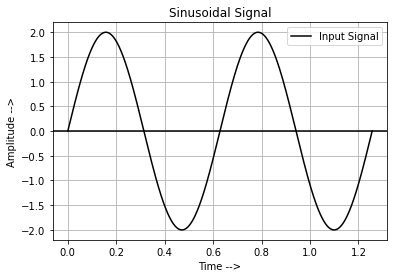

In [4]:
levels = 16  #The levels of the quantization signal
bits = int(np.log2(levels)) #The number of bits required to represent the levels
Amp = 2   #Amplitude of the sinusoidal signal
W_ss = 10 #Frequency of the sinusoidal signal
W_sampling = 1000 # According to Nyquist criteria W_samling>=2*W_ss
T_cycle = 2 *np.pi / W_ss #Time period of the signal
t_org = np.linspace(0,2 * T_cycle, 5000) #List containing points to plot the signal at
x = Amp * np.sin(W_ss * t_org) #Original Signal
plt.plot(t_org,x, color = 'black')
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.legend(['Input Signal'])
plt.show()


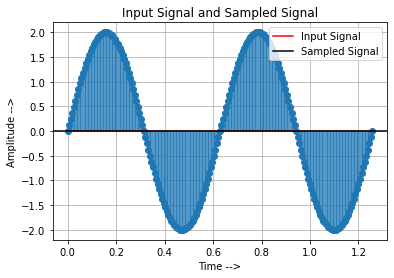

In [5]:
plt.plot(t_org,x, color = 'red')

f_sampling = W_sampling / (2 * np.pi)  #Sampling frequency
T_sampling = 1 / f_sampling # Sampling Period
t = np.arange(0, 200 * T_sampling, T_sampling) #List containing points to plot the signal at

X = Amp * np.sin(W_ss * t) #Sampled signal
plt.stem(t,X)
plt.grid()
plt.title('Input Signal and Sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.legend(['Input Signal', 'Sampled Signal'])
plt.show()

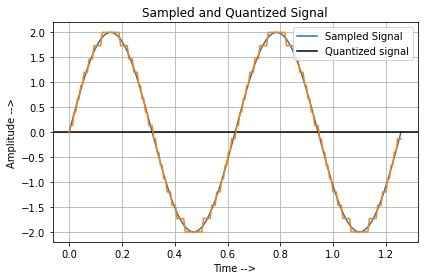

In [6]:
X = Amp * np.sin( W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sampled and Quantized Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')

# Quantized level = 16
Quantized_signal = Uniform_quantizater(X,levels)
plt.plot(t,Quantized_signal)
plt.legend(['Sampled Signal','Quantized signal'])
plt.tight_layout()

In [7]:
quantized_signal = Tabular(Quantized_signal) #This is to display the quantized signal in tabular manner
quantized_signal

,Levels
1,0.133333
2,0.400000
3,0.666667
4,0.933333
5,1.200000
6,1.466667
7,1.733333
8,2.000000
9,-0.133333
10,-0.400000


In [8]:
# SQNR
practical_SQNR = SQNR(X ,Quantized_signal) #Practical Calculation of SQNR
print(practical_SQNR)
theoretical_SQNR = SQNR_theo(bits) #Theoretical Calculation of SQNR
print(theoretical_SQNR)
Error = theoretical_SQNR - practical_SQNR# The difference between the 2 calculated SQNR
print(Error)

25.593893728809807
25.76
0.16610627119019483


In [9]:
quantization_levels = np.array([quantized_signal.Levels[i+1] for i in range(levels)]) #This is to store the quantized values in an array

X_bin = Binary(levels,bits) #TO find the corrosponding binary number for the level
Encoded = pd.DataFrame({'quantization level': quantization_levels.tolist(), 'Binary Representation': np.array(X_bin).tolist()})
Encoded

,quantization level,Binary Representation
0,0.133333,"[0, 0, 0, 0]"
1,0.400000,"[0, 0, 0, 1]"
2,0.666667,"[0, 0, 1, 0]"
3,0.933333,"[0, 0, 1, 1]"
4,1.200000,"[0, 1, 0, 0]"
5,1.466667,"[0, 1, 0, 1]"
6,1.733333,"[0, 1, 1, 0]"
7,2.000000,"[0, 1, 1, 1]"
8,-0.133333,"[1, 0, 0, 0]"
9,-0.400000,"[1, 0, 0, 1]"


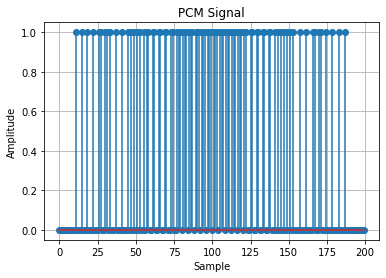

In [10]:
pcm = []
#The purpose of the following block of code is to calculate the PCM of the signal
for i in Quantized_signal:
    for index, level in Encoded.iterrows():
        if i == level["quantization level"]:
            pcm.extend(level["Binary Representation"])

plt.stem(pcm[0:200]) #We have restricted the plot inorder to view the PCM properly
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('PCM Signal')
plt.grid()
plt.show()

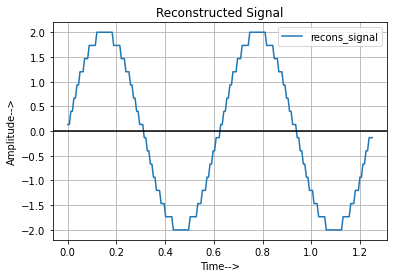

In [11]:
reconstructed_signal = []
for i in range(0, len(pcm), bits):
    binary_sequence = pcm[i:i+bits]
    quantization_level = Encoded.loc[Encoded['Binary Representation'].apply(lambda x: x == binary_sequence), 'quantization level'].values[0]
    reconstructed_signal.append(quantization_level)
t1 = np.delete(t,-1)
plt.plot(t1,reconstructed_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color = 'k')
plt.legend(['recons_signal'], loc = 'upper right')
plt.grid()
plt.show()

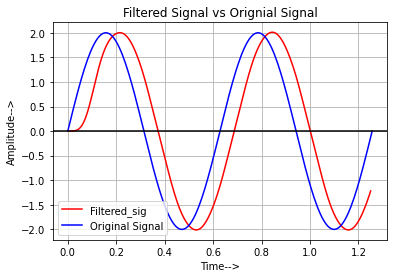

In [12]:
# Define the filter parameters
Fc = 100  # Cutoff frequency of the low pass filter
Filter_order = 5  # Order of the filter
fs = 2000  # Sampling frequecny

# Normalize the cutoff frequency
NY_freq = 0.5 * fs
normalized_cutoff_freq = Fc / NY_freq

# Design the low pass filter
b, a = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)

# Apply the filter to the reconstructed signal
filtered_signal = signal.lfilter(b, a, reconstructed_signal)
plt.plot(t1,filtered_signal, color= 'Red')
plt.plot(t,X, color = 'blue')
plt.title('Filtered Signal vs Orignial Signal')
plt.legend(['Filtered_sig', 'Original Signal'])
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color ='Black')
plt.grid()

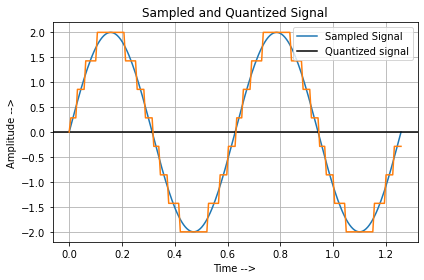

In [21]:
X = Amp * np.sin( W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sampled and Quantized Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')

# Quantized level = 8
levels = 8
Quantized_signal = Uniform_quantizater(X,levels)
plt.plot(t,Quantized_signal)
plt.legend(['Sampled Signal','Quantized signal'])
plt.tight_layout()

In [22]:
quantized_signal = Tabular(Quantized_signal) #This is to display the quantized signal in tabular manner
quantized_signal

,Levels
1,0.285714
2,0.857143
3,1.428571
4,2.000000
5,-0.285714
6,-0.857143
7,-1.428571
8,-2.000000


In [23]:
# SQNR
practical_SQNR = SQNR(X ,Quantized_signal) 
print(practical_SQNR)
theoretical_SQNR = SQNR_theo(bits) 
print(theoretical_SQNR)
Error = theoretical_SQNR - practical_SQNR
print(Error)

19.281182589656584
25.76
6.478817410343417


In [24]:
quantization_levels = np.array([quantized_signal.Levels[i+1] for i in range(levels)]) #This is to store the quantized values in an array

X_bin = Binary(levels,bits) #TO find the corrosponding binary number for the level
Encoded = pd.DataFrame({'quantization level': quantization_levels.tolist(), 'Binary Representation': np.array(X_bin).tolist()})
Encoded

,quantization level,Binary Representation
0,0.285714,"[0, 0, 0, 0]"
1,0.857143,"[0, 0, 0, 1]"
2,1.428571,"[0, 0, 1, 0]"
3,2.000000,"[0, 0, 1, 1]"
4,-0.285714,"[0, 1, 0, 0]"
5,-0.857143,"[0, 1, 0, 1]"
6,-1.428571,"[0, 1, 1, 0]"
7,-2.000000,"[0, 1, 1, 1]"


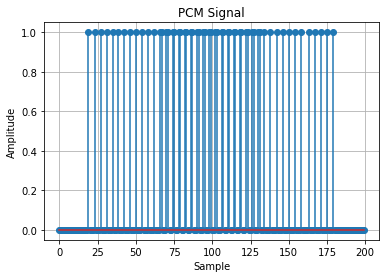

In [25]:
pcm = []
#The purpose of the following block of code is to calculate the PCM of the signal
for i in Quantized_signal:
    for index, level in Encoded.iterrows():
        if i == level["quantization level"]:
            pcm.extend(level["Binary Representation"])

plt.stem(pcm[0:200]) #We have restricted the plot inorder to view the PCM properly
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('PCM Signal')
plt.grid()
plt.show()

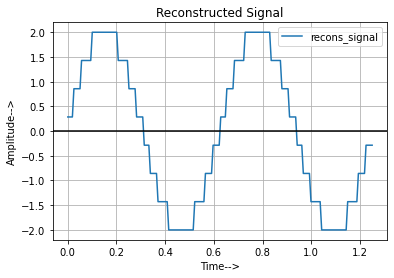

In [26]:
reconstructed_signal = []
for i in range(0, len(pcm), bits):
    binary_sequence = pcm[i:i+bits]
    quantization_level = Encoded.loc[Encoded['Binary Representation'].apply(lambda x: x == binary_sequence), 'quantization level'].values[0]
    reconstructed_signal.append(quantization_level)
t1 = np.delete(t,-1)
plt.plot(t1,reconstructed_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color = 'k')
plt.legend(['recons_signal'], loc = 'upper right')
plt.grid()
plt.show()

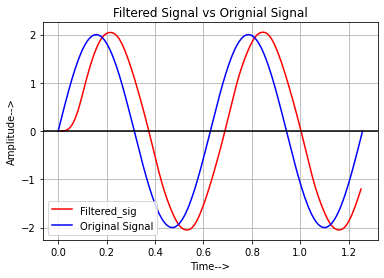

In [27]:
# Define the filter parameters
Fc = 100  # Cutoff frequency of the low pass filter
Filter_order = 5  # Order of the filter
fs = 2000  # Sampling frequecny

# Normalize the cutoff frequency
NY_freq = 0.5 * fs
normalized_cutoff_freq = Fc / NY_freq

# Design the low pass filter
b, a = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)

# Apply the filter to the reconstructed signal
filtered_signal = signal.lfilter(b, a, reconstructed_signal)
plt.plot(t1,filtered_signal, color= 'Red')
plt.plot(t,X, color = 'blue')
plt.title('Filtered Signal vs Orignial Signal')
plt.legend(['Filtered_sig', 'Original Signal'])
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color ='Black')
plt.grid()

1. Uniform PCM:
● We can observe from Figure 1.3 and Figure 1.4 that as the number of
levels are increased the quantization error keeps decreasing because the
quantized values get closer to the original signal values.
● The value SQNR value also keeps on increasing which implies that the
quantized signal gets approximated to the original signal at high
levels.And hence the percentage error decreases with increase in levels.
● Increasing the number of quantization levels expands the range of PCM
signals and allows a wider range of amplitudes.
● With more quantization levels the transitions between different amplitude
levels in the reconstructed signal become sharper which results in a more
accurate representation of the original signal.
2. Non-uniform PCM:
● By passing the input signal through nonlinear elements such as A-law or
μ-law compressors, the dynamic range of the signal is reduced which
helps to preserve the important details of the signal and minimizing the
effects of quantization noise.
● The signal is applied to a uniform PCM system for quantization. Which
divides the reduced dynamic range into a fixed number of quantization
levels.
● The output of the uniform PCM system is passed through the inverse of
the nonlinear element used earlier which expands the dynamic range back
to its initial form.
● The SQNR of a non-uniform PCM system is better as compared to that of
a uniform PCM system.


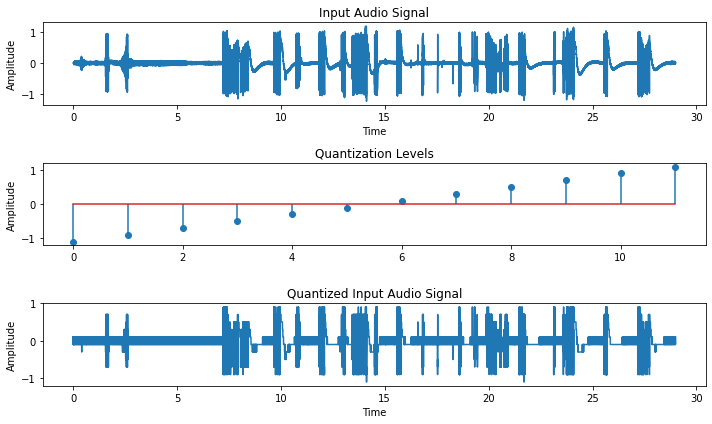

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load audio file
file_path = 'example.mp3'
y, sr = librosa.load(file_path, sr=None)

# Time vector
t = np.arange(0, len(y)) / sr

# Plot input audio signal
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Audio Signal')

# Quantization parameters
n = 12
y_max = max(y)
y_min = min(y)
yquan = y / y_max
d = (y_max - y_min) / n
q = d * np.arange(n) - ((n - 1) / 2) * d

# Plot quantization levels
plt.subplot(3, 1, 2)
plt.stem(q)
plt.ylabel('Amplitude')
plt.title('Quantization Levels')

# Perform quantization
for i in range(n):
    indices = np.logical_and(q[i] - d / 2 <= yquan, yquan <= q[i] + d / 2)
    yquan[indices] = q[i]
    # bquan (find(yquan==q(i)))=(i-1).*ones(1,lenght(find(yquan==q(i))));

# Plot quantized audio signal
plt.subplot(3, 1, 3)
plt.plot(t, yquan)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quantized Input Audio Signal')

plt.tight_layout()
plt.show()


In [2]:
# Calculate power of original signal
power_original = np.mean(y ** 2)

# Calculate quantization error
quantization_error = y - yquan

# Calculate power of quantization error
power_quantization_error = np.mean(quantization_error ** 2)

# Calculate SNR in dB
SNR = 10 * np.log10(power_original / power_quantization_error)

print("SNR:", SNR, "dB")


SNR: 11.358226537704468 dB


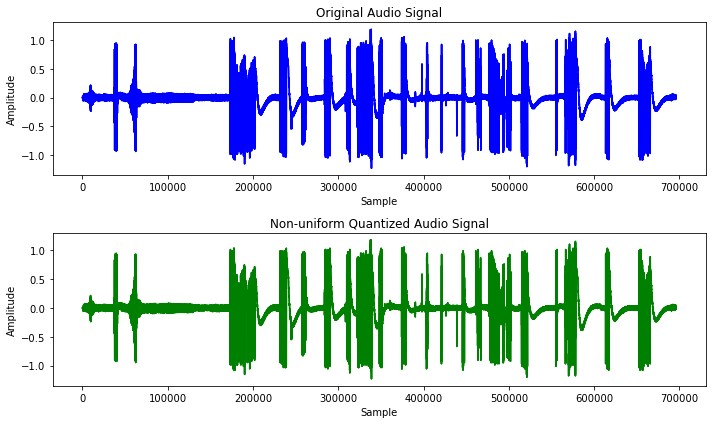


 Signal-to-Noise Ratio (SNR) = 44.02100053277006 dB



In [3]:
import numpy as np
import soundfile as sf
import math
import matplotlib.pyplot as plt

def quant_mulaw(inname, N, mu):
    # Read input signal
    x, fs = sf.read(inname)

    # Define constants
    Q = 1 / N

    # Apply mu-law transform to original sample
    y = np.log10(1 + np.abs(x) * mu) / np.log10(1 + mu)

    # Apply uniform quantization on the absolute value each sample
    yq = np.floor((y) / Q) * Q + Q / 2

    # Apply inverse mu-law transform to the quantized sequence
    # Also use the original sign
    xq = (1 / mu) * (10 ** ((np.log10(1 + mu)) * yq) - 1) * np.sign(x)

    # Plot original and quantized signals
    plt.figure(figsize=(10, 6))

    # Plot input audio signal
    plt.subplot(2, 1, 1)
    plt.plot(x, 'b-', label='Original')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Original Audio Signal')

    # Plot non-uniform quantized input audio signal
    plt.subplot(2, 1, 2)
    plt.plot(xq, 'g-', label='Quantized')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Non-uniform Quantized Audio Signal')

    plt.tight_layout()
    plt.show()

    # Calculate the SNR
    signal_power = np.mean(x ** 2)
    noise_power = np.mean((x - xq) ** 2)
    SNR = 10 * np.log10(signal_power / noise_power)
    print('\n Signal-to-Noise Ratio (SNR) =', SNR, 'dB\n')

# Example usage
quant_mulaw("example.mp3", N=256, mu=255)
